## Training the Model

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('./dataset/student.csv')
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## AIM : Predict the math score of the student

In [4]:
X = df.drop('math_score',axis=1)
X.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [5]:
y = df['math_score']
y.head(2)

0    72
1    69
Name: math_score, dtype: int64

In [6]:
X.shape,y.shape

((1000, 7), (1000,))

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

print("Numerical features: ",num_features)
print("Categorical features: ",cat_features)

Numerical features:  Index(['reading_score', 'writing_score'], dtype='object')
Categorical features:  Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",cat_transformer,cat_features),
    ("StandardScaler",num_transformer,num_features)
])

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [12]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2_score_ = r2_score(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    return mae,mse,r2_score_,rmse

In [13]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "XGBRegressor": XGBRegressor()
}

In [14]:
print(list(models.values())[1])

Lasso()


In [15]:
model_list = []
r2_score_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    model_list.append(list(models.keys())[i])

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train,mse_train,r2_score_train,rmse_train = evaluate_model(y_train,y_train_pred)
    mae_test,mse_test,r2_score_test,rmse_test = evaluate_model(y_test,y_test_pred)

    r2_score_list.append(r2_score_test)

    print(f"Model: {list(models.keys())[i]}")

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_score_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mae_test))
    print("- R2 Score: {:.4f}".format(r2_score_test))
        
    print('='*35)
    print('\n')

Model: LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Model: Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Model: Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


Model: DecisionTree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
-----

In [16]:
model_list_scores = pd.DataFrame(list(zip(model_list,r2_score_list)),columns=['Model_name','R2_Score']).sort_values(by='R2_Score',ascending=False)

In [17]:
model_list_scores

,Model_name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880345
4,RandomForestRegressor,0.851809
8,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.845095
9,XGBRegressor,0.827797
1,Lasso,0.825320
5,KNeighborsRegressor,0.783497
3,DecisionTree,0.739766
6,SVR,0.728600


In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100

print(f"R2 Score of Linear Regression Model: {score:.2f}%")

R2 Score of Linear Regression Model: 88.03%


Text(0, 0.5, 'Predicted Values')

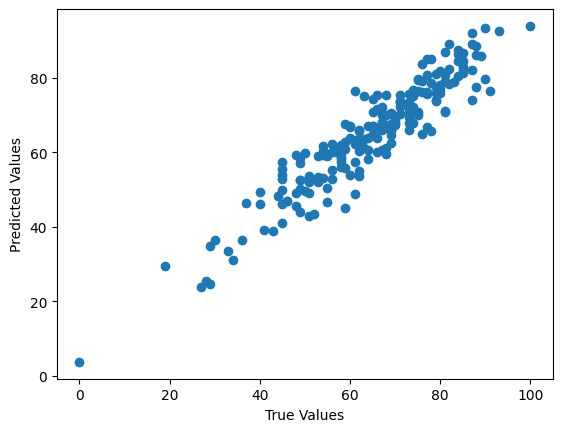

In [23]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math_score'>

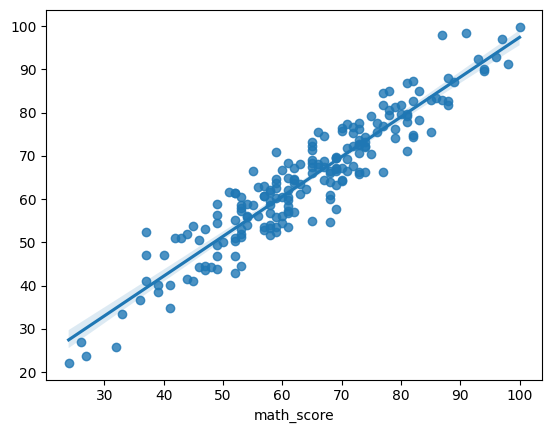

In [53]:
sns.regplot(x=y_test,y=y_pred)